# CURSO 1: MACHINE LEARNING WITH PYTHON


## 1. Regresión

### 1.1. Analisis exploratorio 

In [40]:
#Cargamos los paquetes y el dataset:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

data= pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

In [41]:
#Analizamos los faltantes de datos:

data.replace("?",np.nan,inplace = True)
data_faltante = data.isnull()
for column in data_faltante:
    print(column)
    print (data_faltante[column].sum())
    print(" ")   


MODELYEAR
0
 
MAKE
0
 
MODEL
0
 
VEHICLECLASS
0
 
ENGINESIZE
0
 
CYLINDERS
0
 
TRANSMISSION
0
 
FUELTYPE
0
 
FUELCONSUMPTION_CITY
0
 
FUELCONSUMPTION_HWY
0
 
FUELCONSUMPTION_COMB
0
 
FUELCONSUMPTION_COMB_MPG
0
 
CO2EMISSIONS
0
 


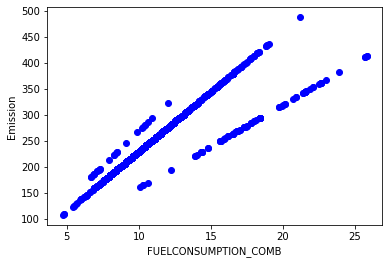

In [42]:
#Ploteamos algunas relaciones:

plt.scatter(data.FUELCONSUMPTION_COMB, data.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

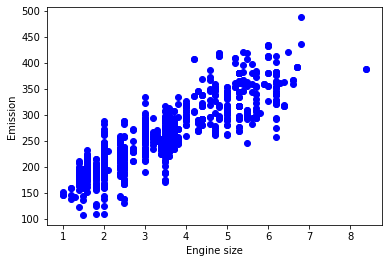

In [43]:
#Ploteamos algunas relaciones:

plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

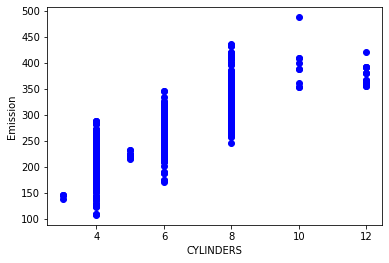

In [44]:
#Ploteamos algunas relaciones:

plt.scatter(data.CYLINDERS, data.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

### 1.2. Regresion lineal simple

Coefficients:  [[39.14931004]]
Intercept:  [124.80764354]
Mean absolute error: 22.65
Residual sum of squares (MSE): 899.55
R2-score: 0.71


Text(0, 0.5, 'Emission')

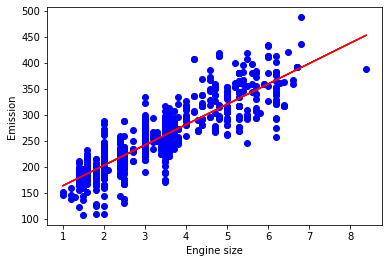

In [45]:
# Divido el data set en train y test: 

msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

# Aplico regresion lineal a traves de un paquete de sklearn:

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Evaluo el modelo: 

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

# Ploteo la linea de regresion por encima de los datos: 

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


### 1.3. Regresion lineal multiple

In [46]:
data_regmul = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

msk = np.random.rand(len(data_regmul)) < 0.8
train = data_regmul[msk]
test = data_regmul[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[10.69049896  7.82749708  9.74449766]]
Intercept:  [62.61210309]
Residual sum of squares: 581.12
Variance score: 0.84


### 1.4. Regresion polinomica

In [47]:
data_regnl = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

msk = np.random.rand(len(data_regnl)) < 0.8
train = data_regnl[msk]
test = data_regnl[~msk]

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Transformo el vector de valores x en una matriz x^0, x^1, x^2, luego aplicare regresion lineal sobre la matriz: 
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Coefficients:  [[ 0.         50.82493246 -1.53481224]]
Intercept:  [107.26523518]
Mean absolute error: 24.21
Residual sum of squares (MSE): 1032.00
R2-score: 0.66


### 1.5. Regresion no lineal

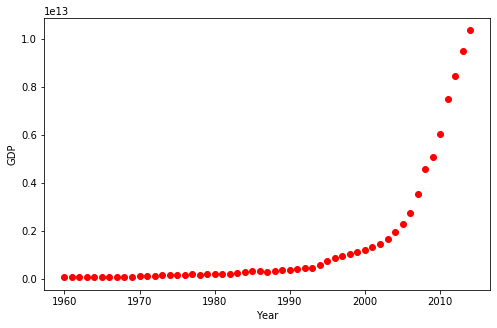

In [48]:
#Importo un nuevo set de datos: 

china_pbi = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv")

#Ploteo los datos: 

plt.figure(figsize=(8,5))
x_data, y_data = (china_pbi["Year"].values, china_pbi["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


In [49]:
# Aproximaremos los datos por una funcion sigmoidal, recordando que la sigmoidal tiene la forma Y = 1/ (1 + 𝑒^𝛽1(𝑋−𝛽2)): 

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Y_pred = sigmoid(china_pbi, beta_1 , beta_2)

# Normalizamos los datos: 
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

#Ploteamos:

x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

NameError: name 'beta_1' is not defined

## 2. Clasificación

### 2.1. K-nearest neighbours

In [50]:
#Cargamos los paquetes y el dataset:

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

client_data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv")
print(client_data.columns)

#Clases de clientes: 
client_data['custcat'].value_counts()


Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [51]:
#Convertimos ahora el dataframe de pandas a un array de numpy para poder usar scikit:

client_data.columns
X = client_data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values 
Y = client_data['custcat'].values

#Normalizamos por metodo z-score con scikit: 

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

#Separamos los datos en train y test: 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#Finalmente aplicamos k-nearest usando una funcion de sklearn:

from sklearn.neighbors import KNeighborsClassifier

k = 4
neighbors_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighbors_predictions = neighbors_model.predict(X_test)

#Evaluamos el modelo:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbors_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, neighbors_predictions))


Train set: (800, 11) (800,)
Test set: (200, 11) (200,)
Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### 2.2. Decision Trees

In [52]:
#Cargamos el dataset:

patient_data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv")
print("Columnas originales: ",patient_data.columns)

#Convertimos las variables categoricas en binarias: 

patient_data = pd.concat([patient_data, pd.get_dummies(patient_data["Sex"])], axis=1)
patient_data.drop("Sex", axis = 1, inplace=True)

patient_data = pd.concat([patient_data, pd.get_dummies(patient_data["BP"])], axis=1)
patient_data.drop("BP", axis = 1, inplace=True)
patient_data.rename(columns={"HIGH":"HIGHBP","LOW":"LOWBP","NORMAL":"NORMALBP"},inplace = True)

patient_data = pd.concat([patient_data, pd.get_dummies(patient_data["Cholesterol"])], axis=1)
patient_data.drop("Cholesterol", axis = 1, inplace=True)
patient_data.rename(columns={"HIGH":"HIGHCholesterol","NORMAL":"NORMALCholesterol"},inplace = True)

print("Columnas sin variables categoricas: ",patient_data.columns)


Columnas originales:  Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
Columnas sin variables categoricas:  Index(['Age', 'Na_to_K', 'Drug', 'F', 'M', 'HIGHBP', 'LOWBP', 'NORMALBP',
       'HIGHCholesterol', 'NORMALCholesterol'],
      dtype='object')


In [53]:
#Ahora llevo los datos a formato array para poder trabajar con scikit: 

X = patient_data[['Age', 'Na_to_K', 'F', 'M', 'HIGHBP', 'LOWBP', 'NORMALBP',
       'HIGHCholesterol', 'NORMALCholesterol']].values
y = patient_data['Drug'].values

#Divido en train y test, y aplico el modelo: 

from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

from sklearn.tree import DecisionTreeClassifier

medTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
medTree.fit(X_trainset,y_trainset)

#Hago algunas predicciones con el modelo: 

predTree = medTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

#Evaluo: 

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
DecisionTrees's Accuracy:  0.9833333333333333


### 2.3. Regresion logistica:


In [54]:
#Cargamos los paquetes y el dataset:

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

churn_data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv")
#print("Columnas originales: ",churn_data.columns)

#Procesamos los datos, aplicamos el modelo y evaluamos: 

data = churn_data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']].astype('float64')
data.dtypes

X = np.asarray(data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(data['churn'])

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

y_predicted = LR_model.predict(X_test)

from sklearn.metrics import jaccard_similarity_score
print('Jaccard index = ',jaccard_similarity_score(y_test, y_predicted))



Jaccard index =  0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


[[ 6  9]
 [ 1 24]]
Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]
              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83        25
         1.0       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



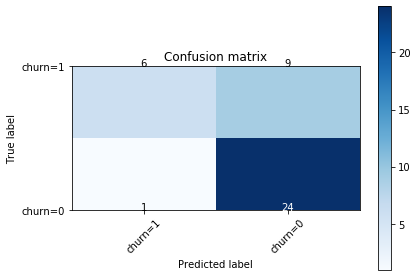

In [55]:
# Veamos otra manera de analizar la exactitud del modelo a traves de la matriz de confusion: 

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_predicted, labels=[1,0]))

cnf_matrix = confusion_matrix(y_test, y_predicted, labels=[1,0])
np.set_printoptions(precision=2)


# Ploteamos la confusion matrix no normalizada:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, y_predicted))

In [56]:
# Probemos ahora con logloss para la exactitud: 

from sklearn.metrics import log_loss
print(log_loss(y_test, y_predicted))


8.634714088663426


### 2.4. Support vector machine: 


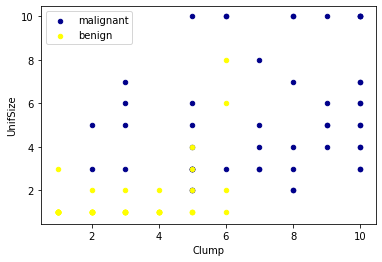

ID             int32
Clump          int32
UnifSize       int32
UnifShape      int32
MargAdh        int32
SingEpiSize    int32
BareNuc        int32
BlandChrom     int32
NormNucl       int32
Mit            int32
Class          int32
dtype: object

In [60]:
#Cargamos los paquetes y el dataset:

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

cancer_data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv")

#Visualizamos y preprocesamos los datos: 

ax = cancer_data[cancer_data['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cancer_data[cancer_data['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

cancer_data.dtypes

cancer_data = cancer_data[pd.to_numeric(cancer_data['BareNuc'], errors='coerce').notnull()].astype('int')
cancer_data.dtypes


Predicho:  [2 4 2 4 2]
Valores reales:  [2 4 2 4 2]
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]
Jaccard index:  0.9635036496350365


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


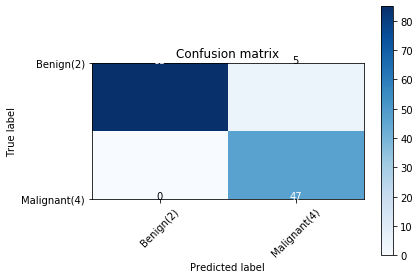

In [62]:
#Procesamos los datos, aplicamos el modelo y evaluamos: 

model_features = cancer_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(model_features)

cancer_data['Class'] = cancer_data['Class'].astype('int')
y = np.asarray(cancer_data['Class'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn import svm
svc_model = svm.SVC(kernel='rbf',gamma = 'auto')
svc_model.fit(X_train, y_train) 

y_predict = svc_model.predict(X_test)
print('Predicho: ',y_predict [0:5])
print('Valores reales: ',y_test [0:5])

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

from sklearn.metrics import jaccard_similarity_score
print('Jaccard index: ',jaccard_similarity_score(y_test, y_predict))

## 2. Clustering

### 2.1. K - means

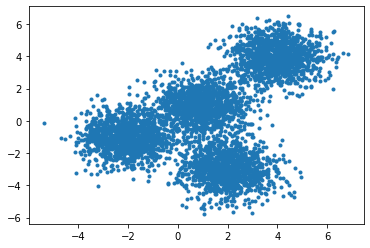

In [86]:
#Cargamos los paquetes y el dataset:

import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

#Primero creamos datos aleatorios, organizados en clusters, con la funcion make_blobs. 
np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()


In [87]:
# Generamos el modelo: 

k_means_model = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means_model.fit(X)
predicted_labels = k_means_model.labels_
predicted_cluster_centers = k_means_model.cluster_centers_

print('Los centros de los clusters son: ',"\n" , predicted_cluster_centers)

Los centros de los clusters son:  
 [[-2.03743147 -0.99782524]
 [ 0.96900523  0.98370298]
 [ 1.99741008 -3.01666822]
 [ 3.97334234  3.98758687]]


[]

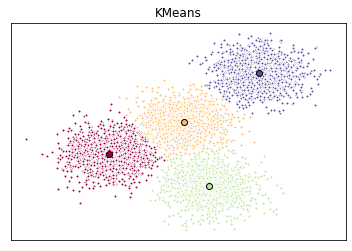

In [88]:
# El siguiente codigo plotea el modelo: 

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(predicted_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (predicted_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = predicted_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())


In [20]:
# Ahora vamos con un dataset de clientes: 

cluster_client = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv")
cluster_client.drop('Address', axis=1, inplace = True) #Eliminamos el feature categorico Addres, que no se puede alimentar al k mean. 

#Normalizamos los datos: 

from sklearn.preprocessing import StandardScaler
X = cluster_client.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

#Aplicamos el modelo: 

clusterNum = 3
k_means_model = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_model.fit(X)
labels = k_means_model.labels_

cluster_client["Clus_km"] = labels
cluster_client.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [21]:
cluster_client.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


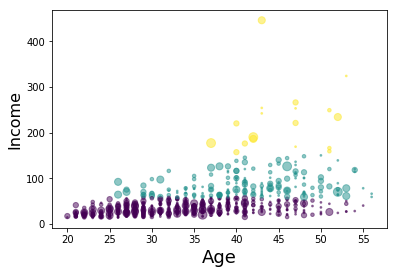

In [22]:
# Vemos la distribucion de clientes en base a edad e ingresos: 

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


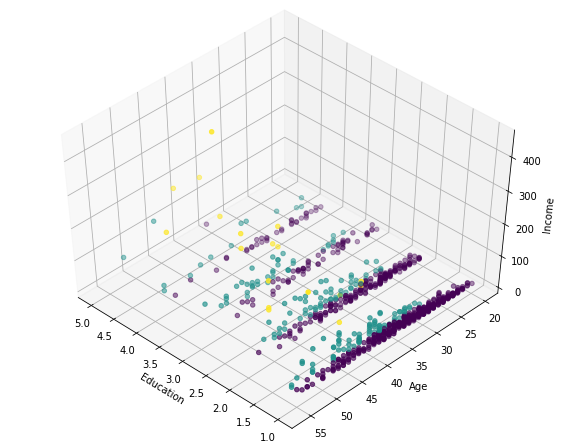

In [23]:
#El siguiente pedazo de codigo plotea en 3d el agrupamiento segun edad, educacion e ingreso: 

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


### 2.2. Hierarchical clustering

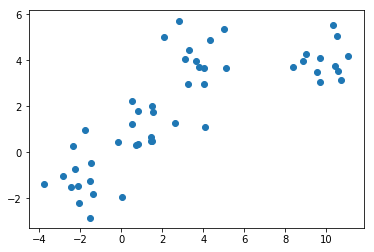

In [4]:
#Cargamos los paquetes y el dataset:

import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

#Creamos datos aleatorios

X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 
plt.show()

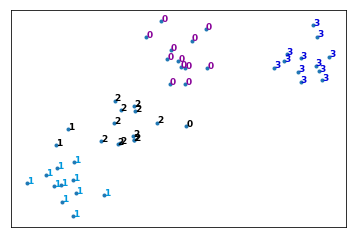

In [6]:
#Generamos el modelo

agglom_model = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom_model.fit(X1,y1)

#El siguiente codigo plotea los clusters generados

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom_model.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')


# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

[[0.         0.76575033 0.30232731 ... 0.25639708 0.14986095 0.40802546]
 [0.76575033 0.         0.99042079 ... 0.78063442 0.84211677 1.11753918]
 [0.30232731 0.99042079 0.         ... 0.5335446  0.38668426 0.12746272]
 ...
 [0.25639708 0.78063442 0.5335446  ... 0.         0.15213998 0.61383371]
 [0.14986095 0.84211677 0.38668426 ... 0.15213998 0.         0.46195437]
 [0.40802546 1.11753918 0.12746272 ... 0.61383371 0.46195437 0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


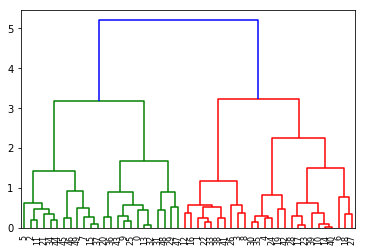

In [8]:
#Corroboramos el calculo de las distancias entre clusters imprimiendo la matriz de distancias

dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

#Imprimimos el dendograma

Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

### 2.3. DBSCAN

In [1]:
#Cargamos los paquetes y el dataset:

import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

# Creamos los datos

def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

#Generamos el modelo

epsilon = 0.3
minimumSamples = 7
db_model = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db_model.labels_

#Identificamos los outliers

core_samples_mask = np.zeros_like(db_model.labels_, dtype=bool) #creo un array booleano del tamaño de los labels
core_samples_mask[db_model.core_sample_indices_] = True #core_sample_indices_ es un array que muestra los indices en los que hay puntos core. 

unique_labels = set(labels)
n_clusters_ = len(set(unique_labels)) - (1 if -1 in labels else 0)

n_clusters_

3

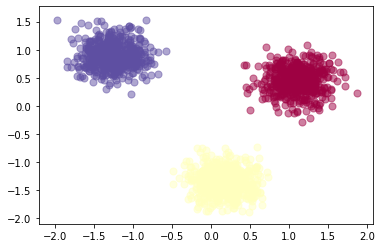

In [2]:
#Ploteamos

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

### 2.4. Caso de uso - Content based filtering recomender system

In [1]:
#Cargamos los paquetes y el dataset:

import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

movies_df = pd.read_csv('C:/Users/Hp/Documents/Python/Movies 1/movies.csv')
ratings_df = pd.read_csv('C:/Users/Hp/Documents/Python/Movies 1/ratings.csv')

movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
# Extraemos el año entre parentesis del titulo de la pelicula

movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())

movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [3]:
#Ahora separamos los generos en elementos dentro de la columna genero

movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [4]:
#Guardamos los datos en el formato que quedaron hasta ahora y separamos los generos por one hot encoding

moviesWithGenres_df = movies_df.copy()

for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1

moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Ahora procesamos los ratings

ratings_df.head()
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


In [6]:
#Ahora creamos un usuario cualquiera con sus ratings de peliculas

userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [7]:
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
inputMovies = pd.merge(inputId, inputMovies)
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


In [8]:
#Tomamos en el input solo las películas que rateo el usuario y lo limpiamos para obtener la tabla de generos

userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies = userMovies.reset_index(drop=True)
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Ahora creamos el perfil de preferencias multiplicando los ratings por la matriz de generos

userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
userProfile

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

In [10]:
#Con el perfil generado ahora podemos hacer recomendaciones

genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()


movieId
1    0.594406
2    0.293706
3    0.188811
4    0.328671
5    0.188811
dtype: float64

## 3. Proyecto final

### 3.1. Procesamiento de datos

In [45]:
#Cargamos los paquetes y el dataset:

import itertools
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#Cargamos la primera serie de datos, que se utilizara para entrenar

loan_df = pd.read_csv('C:/Users/Hp/Documents/Python/Loans/loan_train.csv')
loan_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [46]:
#Analizamos los faltantes de datos:

loan_df.replace("?",np.nan,inplace = True)
data_faltante = loan_df.isnull()
for column in data_faltante:
    print(column)
    print (data_faltante[column].sum())
    print(" ")   

Unnamed: 0
0
 
Unnamed: 0.1
0
 
loan_status
0
 
Principal
0
 
terms
0
 
effective_date
0
 
due_date
0
 
age
0
 
education
0
 
Gender
0
 


In [47]:
#Analizamos y corregimos los tipos de datos

loan_df.dtypes
loan_df['due_date'] = pd.to_datetime(loan_df['due_date'])
loan_df['effective_date'] = pd.to_datetime(loan_df['effective_date'])
loan_df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [48]:
#Hacemos algunas visualizaciones

loan_df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

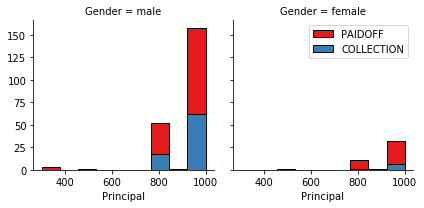

In [49]:
import seaborn as sns

bins = np.linspace(loan_df.Principal.min(), loan_df.Principal.max(), 10)
g = sns.FacetGrid(loan_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()

plt.show()

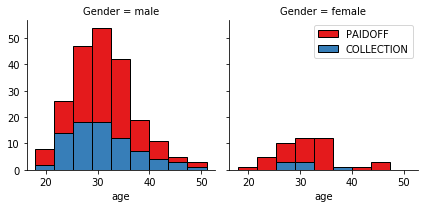

In [50]:
bins = np.linspace(loan_df.age.min(), loan_df.age.max(), 10)
g = sns.FacetGrid(loan_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

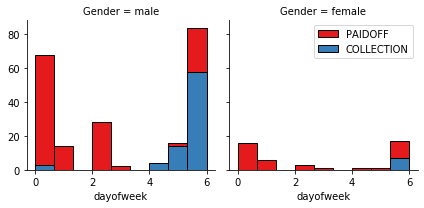

In [51]:
# Agregamos una columna con el dia de la semana correspondiente a la fecha efectiva
loan_df['dayofweek'] = loan_df['effective_date'].dt.dayofweek


bins = np.linspace(loan_df.dayofweek.min(), loan_df.dayofweek.max(), 10)
g = sns.FacetGrid(loan_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [52]:
#Vemos la distribucion de pago segun el nivel educativo

loan_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [53]:
#En base a las anteriores visualizaciones, extraemos los features a utilizar

Feature = loan_df[['Principal','terms','age','Gender','education']]

# Observamos que la gente que recibe el prestamos sobre el fin de semana tiende a no pagar, creamos entonces una categorizacion 
# fin de semana

loan_df['weekend'] = loan_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#Transformamos el genero en una variable 0-1

loan_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#Redefinimos Feature con las anteriores transformaciones

Feature = loan_df[['Principal','terms','age','Gender','weekend']]



In [54]:
#Convertimos el nivel educativo en valores numericos por one hot encoding

Feature = pd.concat([Feature,pd.get_dummies(loan_df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [55]:
# Armamos los datos del modelo

X_train = Feature
y_train = loan_df['loan_status'].values

#Normalizamos los datos

X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679]])

### 3.2. Modelado

#### 3.2.1. K - nearest neighbours

In [56]:
# Import packages

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Split train data in to train and test for k analisis

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split( X_train, y_train, test_size=0.2, random_state=4)

#Train model and determine optimal k

accuracy_vector = []
for k in range(1,11):
    neigh_model = KNeighborsClassifier(n_neighbors = k).fit(X_train_train,y_train_train)
    yhat = neigh_model.predict(X_train_test)
    accuracy_vector.append(metrics.accuracy_score(y_train_test, yhat))

optimal_k = np.argmax(accuracy_vector)
neigh_model = KNeighborsClassifier(n_neighbors = optimal_k).fit(X_train,y_train)

#Print results

print("The optimal k for this data set is: ", optimal_k)

The optimal k for this data set is:  6


#### 3.2.2. Decision Tree

In [57]:
# Import packages

from sklearn.tree import DecisionTreeClassifier

#Train model

loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loan_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 3.2.3. Support vector machine

In [58]:
# Import packages
from sklearn import svm

#Train model
svc_model = svm.SVC(kernel='rbf',gamma = 'auto')
svc_model.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 3.2.4. Logistic Regresion

In [60]:
# Import packages

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Train model

LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

### 3.3. Evaluation

#### 3.3.1. Aplication of the same preprocesing to test data

In [82]:
# Import packages

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Load data

test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')

In [83]:
#Procesing

# To date time
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

#Weekend variable
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#Gender to numerical
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#One hot encoding and normalization
X_test = test_df[['Principal','terms','age','Gender','weekend']]
X_test = pd.concat([X_test,pd.get_dummies(test_df['education'])], axis=1)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

y_test = test_df['loan_status'].values

In [78]:
# Prediction and evaluation

# K nearest
neigh_yhat = neigh_model.predict(X_test)
print('K nearest Jaccard index = ',jaccard_similarity_score(y_test, neigh_yhat))
print('K nearest F1 score = ', f1_score(y_test, neigh_yhat,average='weighted'))

# Decision tree
predTree = loan_tree.predict(X_test)
print('Decision Tree Jaccard index = ',jaccard_similarity_score(y_test, predTree))
print('Decision Tree F1 score = ', f1_score(y_test, predTree,average='weighted'))

# SVM
svm_yhat = svc_model.predict(X_test)
print('SVM Jaccard index = ',jaccard_similarity_score(y_test, svm_yhat))
print('SVM F1 score = ', f1_score(y_test, svm_yhat,average='weighted'))

# logistic regresion
log_yhat = LR_model.predict(X_test)
print('logistic regresion Jaccard index = ',jaccard_similarity_score(y_test, log_yhat))
print('logistic regresion F1 score = ', f1_score(y_test, log_yhat,average='weighted'))


K nearest Jaccard index =  0.6666666666666666
K nearest F1 score =  0.6666666666666666
Decision Tree Jaccard index =  0.7777777777777778
Decision Tree F1 score =  0.7283950617283951
SVM Jaccard index =  0.7222222222222222
SVM F1 score =  0.6212664277180406
logistic regresion Jaccard index =  0.7407407407407407
logistic regresion F1 score =  0.6304176516942475


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pac

In [93]:
# Computing log loss

y_test = np.where(y_test=='PAIDOFF', 1, y_test) 
y_test = np.where(y_test=='COLLECTION', 0, y_test) 
y_test = y_test.astype(float)

log_yhat = np.where(log_yhat=='PAIDOFF', 1, log_yhat) 
log_yhat = np.where(log_yhat=='COLLECTION', 0, log_yhat) 
log_yhat = log_yhat.astype(float)

print('logistic regresion log loss = ', log_loss(y_test, log_yhat))



logistic regresion log loss =  8.95470488690319


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
